In [155]:
#UBCF
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [156]:
#Book = pd.read_csv("book.csv", engine='python')
#Book.head()

Note: We Can use both encoding = 'latin-1' and engine='python' for UTF - 8 error.

In [157]:
book = pd.read_csv('book.csv', encoding='latin-1', index_col=[0])

book.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [158]:
buk = book.rename(columns={'User.ID': 'UserID', 'Book.Title': 'Books', 'Book.Rating': 'Rating'})

buk

,UserID,Books,Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [159]:
#number of unique users in the dataset
len(buk.UserID.unique())

2182

In [160]:
len(buk.Books.unique())

9659

In [161]:
print(buk.shape)
print(list(buk.columns))

(10000, 3)
['UserID', 'Books', 'Rating']


8     2283
1       43
9     1493
2       63
10    1732
3      146
4      237
5     1007
6      920
7     2076
Name: Rating, dtype: int64


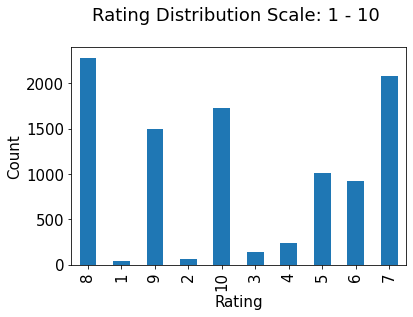

In [162]:
plt.rc("font", size=15)
print(buk.Rating.value_counts(sort=False))
buk.Rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution Scale: 1 - 10 \n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<li>We can observe that the Highest ratings on a scale of 1 to 10 are for 8,7,10,9
<li>Lowest Rating on a scale on 1 to 10 are for 4,3,2,1

In [163]:
rating_count = pd.DataFrame(buk.groupby('Books')['Rating'].count()) #counting ratings
rating_count.sort_values('Rating', ascending=False).head(10) #sorting with respect to highest ratings

,Rating
Books,
Fahrenheit 451,5
Ender's Game (Ender Wiggins Saga (Paperback)),4
Stardust,4
Vanished,4
Charlie and the Chocolate Factory,4
"The Subtle Knife (His Dark Materials, Book 2)",4
"The Amber Spyglass (His Dark Materials, Book 3)",4
"The Golden Compass (His Dark Materials, Book 1)",3
Pet Sematary,3


In [164]:
average_rating = pd.DataFrame(buk.groupby('Books')['Rating'].mean())
average_rating['Rating_Count'] = pd.DataFrame(buk.groupby('Books')['Rating'].count())
average_rating.sort_values('Rating_Count', ascending=False).head()

,Rating,Rating_Count
Books,,
Fahrenheit 451,7.00,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
Stardust,8.50,4
Vanished,6.50,4
Charlie and the Chocolate Factory,6.50,4


In [165]:
# User - Books pair with highest Ratings:

buk[['UserID', 'Books', 'Rating']] \
     .sort_values('Rating', ascending = False).head()

,UserID,Books,Rating
7786,3943,The Bunyans,10
2319,278750,Sit &amp; Solve - Lateral Thinking Puzzles,10
2326,278772,Feeling Good : The New Mood Therapy,10
5635,2453,O Little Town Of Glory (Men Of Glory) (Harleq...,10
2341,278807,Women Can't Hear What Men Don't Say: Destroyin...,10


In [166]:
# User-Book pair having more than 1 rating in the dataset: 

userRatesPerBookCount = buk.groupby(['UserID', 'Books'], as_index = False).count().sort_values('Rating', ascending = False)
userRatesPerBookCount.head(20)

,UserID,Books,Rating
5022,3757,The Magician's Tale,2
9614,278418,White Oleander : A Novel,2
7475,162052,Rose,2
2810,2276,In the Beauty of the Lilies,2
2395,2033,The First Time,2
1377,1211,Black House,2
2650,2152,Le nouveau soleil de Teur,2
6664,161511,Burger Wuss,1
6659,161499,P.S. Longer Letter Later,1
6660,161499,Stuart Little,1


In [167]:
# Let's double check if this is true:

buk[(buk.UserID == 3757) & (buk.Books == '''The Magician's Tale''')]

,UserID,Books,Rating
7046,3757,The Magician's Tale,7
7440,3757,The Magician's Tale,7


In [168]:
user_books_df = buk.pivot_table(index='UserID',
                                 columns='Books',
                                 values='Rating').reset_index(drop=True)

In [169]:
user_books_df

Books,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
user_books_df.index = buk.UserID.unique()

In [171]:
user_books_df

Books,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#Impute those NaNs with 0 values
user_books_df.fillna(0, inplace=True)

In [173]:
user_books_df

Books,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [175]:
user_similar = 1 - pairwise_distances( user_books_df.values,metric='cosine') 

In [176]:
user_similar

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [177]:
#Store the results in a dataframe
user_similar_df = pd.DataFrame(user_similar)

In [178]:
#Set the index and column names to user ids 
user_similar_df.index = buk.UserID.unique()
user_similar_df.columns = buk.UserID.unique()

In [179]:
user_similar_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [180]:
np.fill_diagonal(user_similar, 0)
user_similar_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
#Most Similar Users
user_similar_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

# First four similar UserID's based on ratings

In [182]:
buk[(buk['UserID']==276729) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6


In [183]:
buk[(buk['UserID']==276736) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
4,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [184]:
buk[(buk['UserID']==276737) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
5,276737,The Mummies of Urumchi,6


In [185]:
buk[(buk['UserID']==276744) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
6,276744,The Kitchen God's Wife,7


# Last Five similar UserID's based on ratings

In [186]:
#Most Similar Users
user_sim_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [187]:
buk[(buk['UserID']==162107) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
9988,162107,What's Bred in the Bone,7


In [188]:
buk[(buk['UserID']==162109) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
9989,162109,The Flower in the Skull,10


In [189]:
buk[(buk['UserID']==162113) | (buk['UserID']==161453)]

,UserID,Books,Rating
8960,161453,"Bread, Tomato, Garlic: Quick Cooking With 3 Ma...",9
8961,161453,"The Ubiquitous Shrimp: From Simple to Exotic, ...",8
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [190]:
buk[(buk['UserID']==162121) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
9991,162121,The Cloister Walk,7
9992,162121,Open Water,5
9993,162121,The Evolution of Jane,8
9994,162121,AT PARADISE GATE,8
9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [191]:
buk[(buk['UserID']==162129) | (buk['UserID']==276726)]

,UserID,Books,Rating
1,276726,Classical Mythology,5
10000,162129,Kids Say the Darndest Things,6


In [192]:
user_1=buk[buk['UserID']==162113] 

In [193]:
user_2=buk[buk['UserID']==161453]

In [194]:
user_2.Books

8960    Bread, Tomato, Garlic: Quick Cooking With 3 Ma...
8961    The Ubiquitous Shrimp: From Simple to Exotic, ...
Name: Books, dtype: object

In [195]:
user_1.Books

9990    The Cape Ann (Contemporary American Fiction)
Name: Books, dtype: object

In [196]:
pd.merge(user_1,user_2,on='Books',how='outer')

,UserID_x,Books,Rating_x,UserID_y,Rating_y
0,162113.0,The Cape Ann (Contemporary American Fiction),8.0,NaN,NaN
1,NaN,"Bread, Tomato, Garlic: Quick Cooking With 3 Ma...",NaN,161453.0,9.0
2,NaN,"The Ubiquitous Shrimp: From Simple to Exotic, ...",NaN,161453.0,8.0


<li> We can see that most of the books that are similar to each other are based on ratings.
<li> The first five similar books have ratings 3 to 8.
<li> The last five similar books have ratings 5 to 10.
<li> We can further try Item based collaborative filtering for recommendations.

# Item Based Collaborative Filtering

In [197]:
#Fetching ratings for Classical Mythology
Classical_user_rating = user_movies_df['Classical Mythology']  

In [198]:
Classical_user_rating

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
         ... 
162107    0.0
162109    0.0
162113    0.0
162121    0.0
162129    0.0
Name: Classical Mythology, Length: 2182, dtype: float64

In [199]:
#Finding the correlation with different movies
similar_to_Classical = user_movies_df.corrwith(Toy_user_rating) 

In [200]:
similar_to_Classical.head(10)

Books
 Jason, Madison &amp                                                    -0.000459
 Other Stories;Merril;1985;McClelland &amp                              -0.000459
 Repairing PC Drives &amp                                               -0.000459
'48                                                                     -0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   -0.000459
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR            -0.000459
01-01-00: A Novel of the Millennium                                     -0.000459
1,401 More Things That P*Ss Me Off                                      -0.000459
10 Commandments Of Dating                                               -0.000459
100 Great Fantasy Short, Short Stories                                  -0.000459
dtype: float64

In [201]:
corr_Toy = pd.DataFrame(similar_to_Classical, columns=['Correlation'])
corr_Toy.dropna(inplace=True)
corr_Toy.head()

,Correlation
Books,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [202]:
corr_Toy[corr_Toy['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
Books,
Classical Mythology,1.0


# Insights: 



<li>We can observe that the Item based collaborative filetring have correlation in negative.
<li>so we can go ahead and recommend Books based on similar ratings for other books by users.
<li> So we can either recommend the user books from first Five or last Five similar ratings.
<li> In conclusion we can recommend books based on similar ratings by users.